# Audio Dispersion
In this project I am going to experiment  audio  dispersion using Phyphox app. Phyphox is an app that uses the sensors in a smartphone to perform physics experiments. The app is developed by  RWTH Aachen University, Germany. More about phyphox can be found  on [PhyPhox](http://phyphox.org) website.\
Audio dispersion is also done with Broadband Transmision Method . This method requires the measurements of a reference velocity to obtain values for the acoustic dispersion in different medium. In our case we will do it simply by taking fourier transform in Jupyter Notebook.

The goal is to clean out noisy Audio signal by Audio dispersion. We will take noisy audio data with Phyphox and than by using  fourer transform we will be able to remove some noisy frequencies.

## What is Audio Dispersion: 
When a wave is a distrubance in a medium (like waves in water) which propagate through the medeum,without moving of the medium.A travelling wave can be described by the following  equation:\
                $ y(x,t) = asin(kx−ωt) $ \
Here,\
y(x,t) : The height of the wave at position x, and time t \
a : The amplitude of the wave\
k : The wave number\
ω : The angular frequency. 

The speed at which the wave propagate is given by:   v = w/k . 
More about traveling waves can be found [Here](https://openstax.org/books/university-physics-volume-1/pages/16-1-traveling-waves)

If multiple waves such as\
$ y_1= a_1sin(k_1x−ω_1t)$,\
$y_2 = a_2sin(k_2x−ω_2t)$\
............ \
 travels together , the equation of the resultant wave is given by their sum:\
$ y_{sum} = a_1sin(k_1x−ω_1t)+a_2sin(k_2x−ω_2t)+......$

The amplitude of the resultant wave depends on the frquency of each wave.  

Lets for $ w_1$  and $ w_2 $ 
If $ ω_1/k_1 = ω_2/k_2  $ , both  waves  propagate at the same speed, there will be no dispersion,the shape of the resultant function does not change as it moves forward.  But  when waves of different frequencies propagate at different speeds it causes Dispersion, and the shape of the resultant wave changes as it moves through medium. 

### Algorithm :
In this project , I am going to use Fourier Transform to disperse the sound wave. Fourer transform will allow us to convert the information from the  time domain to the frequency domain. 

# Conversion Time Domain to frequency domain by FT

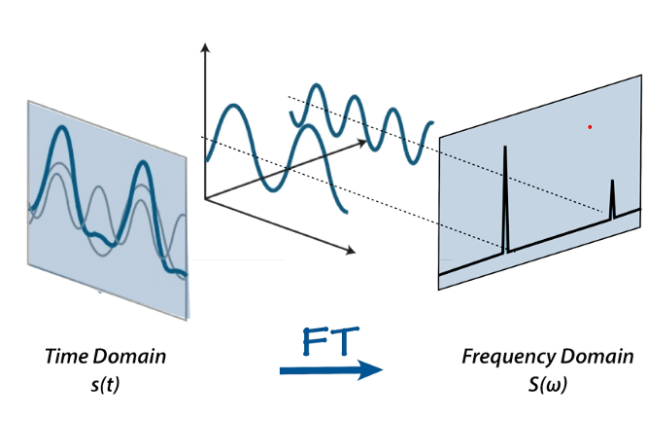

In [ ]:
DFT vs FFT  Comparisn. 

### Taking audio data  with Phyphox app. 

Using the phyphox app, I have recorded audio data from a music playing on TV.From the audio data, I am going to simply seperate the frequencies using FFT. Phyphox uses the cellphones micriphone to record the audio amplitudes.  The screen shot of the data visualization (within the app) is shown below : 
![image](sc.png)

### Importing necessary libraries
For the data visualization , I am going to use Pandas, more about pandas can be found  [here](https://pandas.pydata.org/docs/index.html). I am going to use numpy and matplotlib to visualize the data. I am also going to use scipy to take the Fourer transform of the audio data .

In [119]:
import numpy as np
import pandas as pd
# Import ploting tool
import matplotlib.pyplot as plt
# Linting tool
%load_ext pycodestyle_magic
%pycodestyle_on

### Loading audio data in jupyter notebook. 
From the phyphox app, we can export the audio data as a ".csv" file which we will use in the following analysis.

In [124]:
# reading csv file
df = pd.read_csv('Data/Amplitudes.csv', sep=',')
# Taking column data and assigning to list
spl = df["Sound pressure level (dB)"]
time = df["Time (s)"]

### Visualization of audio data in Time-domain 
If we plot the Amplitude vs time  the visual information we get is here :

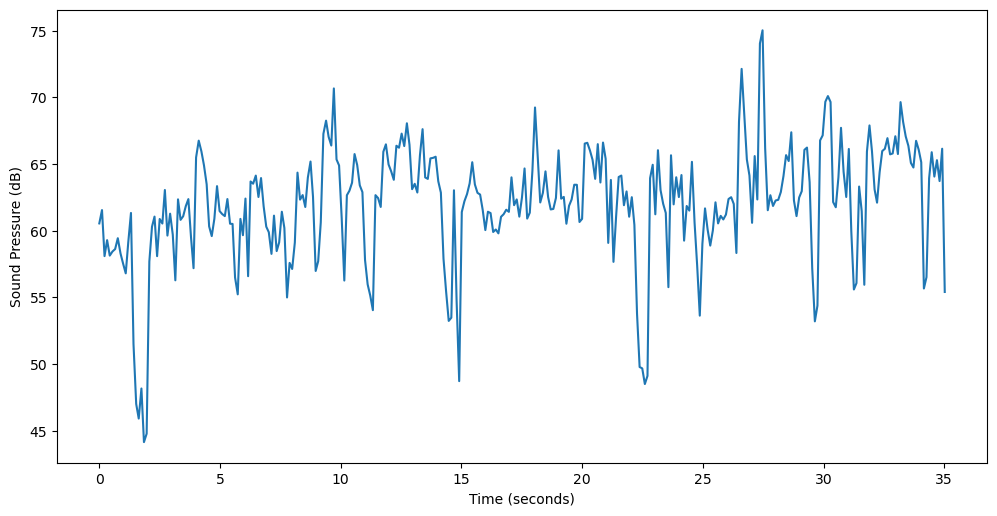

In [127]:
plt.figure(figsize=[12, 6])
plt.rcParams["figure.dpi"] = 100
plt.plot(time, amplitude)
plt.xlabel("Time (seconds)")
plt.ylabel("Sound Pressure (dB)")
plt.show()

This is the same plot as it was shown by the phyphox app. 

### Converting to frequency domain by Fast Fourier Transform

/usr/lib/python3/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


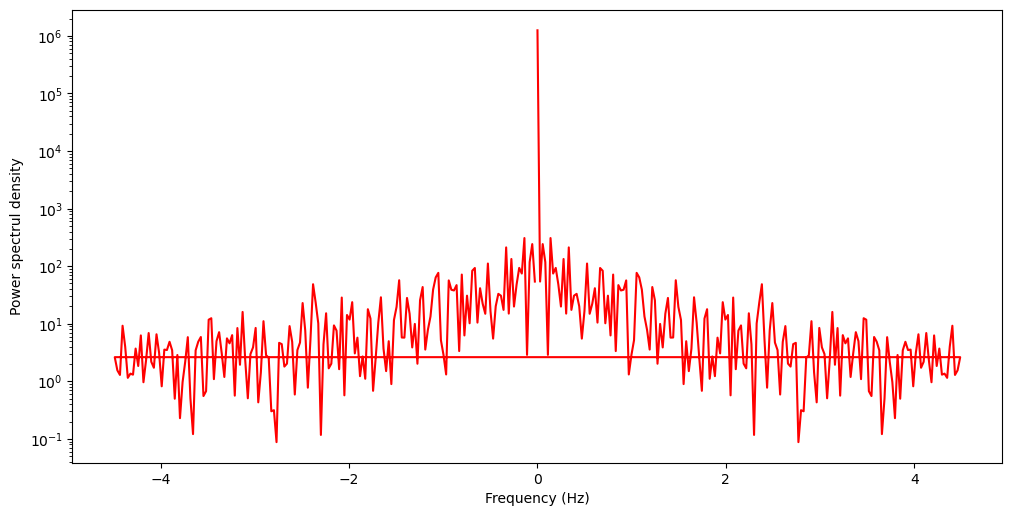

In [134]:
# Necessary imports for FFT
from scipy.fft import fft, fftfreq, rfft, rfftfreq
# from scipy import signal

# Number of samples in normalized_tone
sampling_rate = round(len(amplitude)/time[len(time)-1])
N = sampling_rate * time[len(time)-1]

amplitude_fft = fft(amplitude.to_numpy())
psd = amplitude_fft * np.conj(amplitude_fft) / len(time)

# Getting frequency
freqs = fftfreq(psd.shape[0], 1 / sampling_rate)

plt.figure(figsize=[12, 6])
# Converting y axis to log scale
plt.yscale('log')
plt.ylabel("Power spectrul density")
plt.xlabel("Frequency (Hz)")
plt.plot(freqs, psd, color='red')
plt.show()

### Denoising the signal
I am going to neglect all signal with  below PSD  of  50. 

/usr/lib/python3/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/lib/python3/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


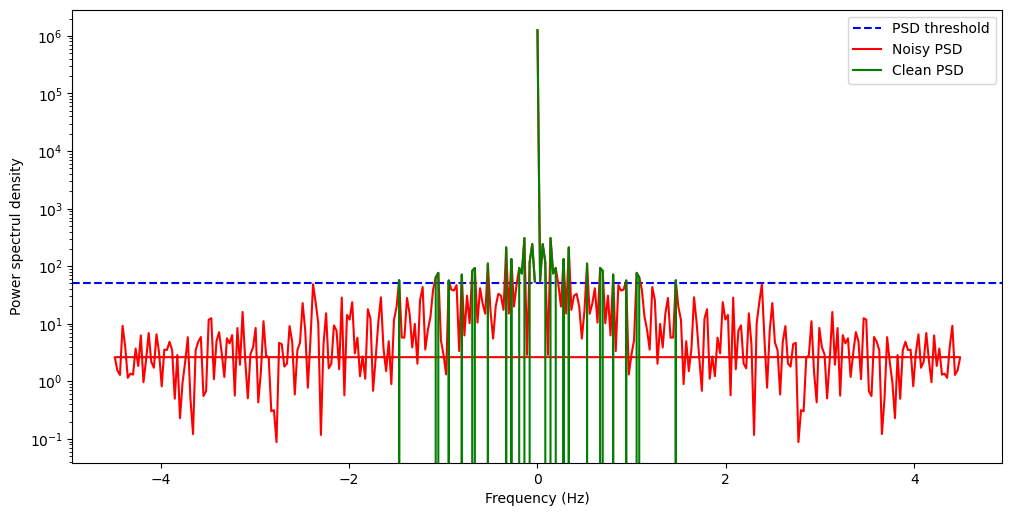

In [138]:
# Our target frequency is filtering_threshold
filtering_threshold = 50
indices = psd > filtering_threshold

# cleaning out the noise below the threshold power spectrul of frequencies
psd_clean = psd * indices

# ploting the clean signal PSD on top of noisy signal PSD
plt.figure(figsize=[12, 6])
plt.yscale('log')
plt.ylabel("Power spectrul density")
plt.xlabel("Frequency (Hz)")
plt.axhline(y=filtering_threshold, color='blue', linestyle='--',
            label="PSD threshold")
plt.plot(freqs, psd, color="red", label="Noisy PSD")
plt.plot(freqs, psd_clean, color='green', label="Clean PSD")
plt.legend(loc="upper right")
plt.show()

### Applying the Inverse FFT to get back to the original signal after canceling noise

/tmp/ipykernel_92/2599735971.py:5: DeprecationWarning: scipy.ifft is deprecated and will be removed in SciPy 2.0.0, use scipy.fft.ifft instead
  amplitude_clean = ifft(amplitude_fft_clean.to_numpy())
/usr/lib/python3/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'Time (seconds)')

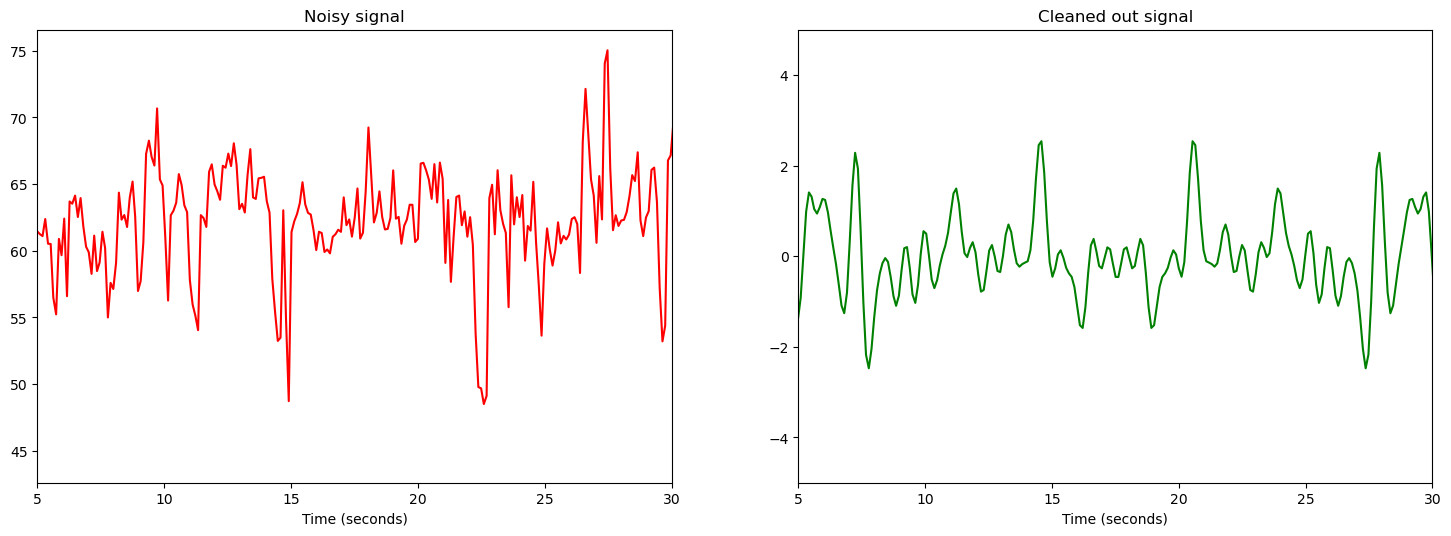

In [141]:
# Imports
from scipy import ifft

amplitude_fft_clean = amplitude * indices
amplitude_clean = ifft(amplitude_fft_clean.to_numpy())

# # ploting the noisy signal and clean signal
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
# fig.tight_layout()
# Plot Noisy Signal
axs[0].set_title('Noisy signal')
axs[0].plot(time, amplitude, color="red", label="Noisy signal")
axs[0].set_xlabel("Amplitude")
axs[0].set_xlabel("Time (seconds)")
axs[0].set_xlim([5, 30])

# Plot cleaned signal
axs[1].set_title('Cleaned out signal')
axs[1].plot(time, amplitude_clean, color='green', label="Clean signal")
axs[1].set_ylim([-5, 5])
axs[1].set_xlim([5, 30])
axs[1].set_xlabel("Amplitude")
axs[1].set_xlabel("Time (seconds)")

Therefore , we can see that the filtered signal is much more cleaner.